# Importing Basic Packages

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Scikit-learn Packages

In [66]:
from sklearn import linear_model
from sklearn.metrics import r2_score

# Importing Data

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [46]:
df = pd.read_csv("MY2022_Fuel_Consumption_Ratings.csv", encoding='cp1252')

## Taking a look at dataset

In [47]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size_(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_in_City_(L/100 km),Fuel_Consumption_on_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km),Fuel_Consumption_Comb_(mpg),CO2_Emissions_(g/km),CO2_Rating,Smog_Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


## Exploratory Data Analysis

In [48]:
df.shape

(945, 15)

In [50]:
df.dtypes

Model_Year                               int64
Make                                    object
Model                                   object
Vehicle_Class                           object
Engine_Size_(L)                        float64
Cylinders                                int64
Transmission                            object
Fuel_Type                               object
Fuel_Consumption_in_City_(L/100 km)    float64
Fuel_Consumption_on_Hwy_(L/100 km)     float64
Fuel_Consumption_Comb_(L/100 km)       float64
Fuel_Consumption_Comb_(mpg)              int64
CO2_Emissions_(g/km)                     int64
CO2_Rating                               int64
Smog_Rating                              int64
dtype: object

In [49]:
# To summarize the data
df.describe()

,Model_Year,Engine_Size_(L),Cylinders,Fuel_Consumption_in_City_(L/100 km),Fuel_Consumption_on_Hwy_(L/100 km),Fuel_Consumption_Comb_(L/100 km),Fuel_Consumption_Comb_(mpg),CO2_Emissions_(g/km),CO2_Rating,Smog_Rating
count,945.0,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2022.0,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582,4.533333,4.951323
std,0.0,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225,1.472632,1.678554
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000,4.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [51]:
sub_df_1 = df[['Engine_Size_(L)','Cylinders','Fuel_Consumption_Comb_(L/100 km)','CO2_Emissions_(g/km)']]
sub_df_1.head(9)

,Engine_Size_(L),Cylinders,Fuel_Consumption_Comb_(L/100 km),CO2_Emissions_(g/km)
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
5,2.0,4,9.8,231
6,3.0,6,11.0,256
7,3.0,6,11.2,261
8,2.0,4,8.7,205


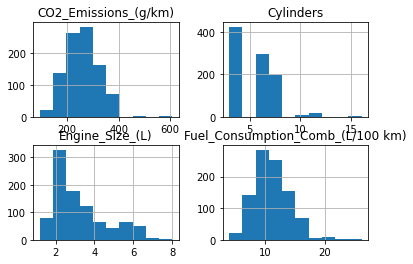

In [52]:
sub_df_1.hist()
plt.show()

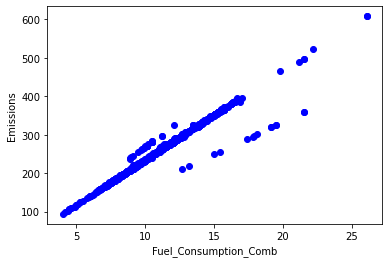

In [53]:
plt.scatter(sub_df_1['Fuel_Consumption_Comb_(L/100 km)'], sub_df_1['CO2_Emissions_(g/km)'],  color='blue')
plt.xlabel("Fuel_Consumption_Comb")
plt.ylabel("Emissions")
plt.show()

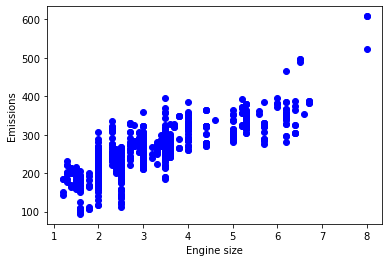

In [54]:
plt.scatter(sub_df_1['Engine_Size_(L)'], sub_df_1['CO2_Emissions_(g/km)'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

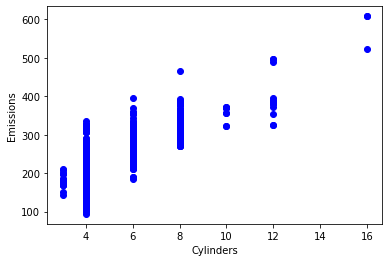

In [59]:
plt.scatter(sub_df_1['Cylinders'], sub_df_1['CO2_Emissions_(g/km)'],  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

# Simple Linear Regression Model

## Splitting the dataset into Training and Testing Sets

In [61]:
# Train-Test Split - 80%:20%

mask = np.random.rand(len(df)) < 0.8
train = sub_df_1[mask]
test = sub_df_1[~mask]

## Train data distribution

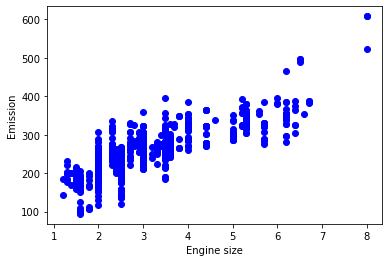

In [62]:
plt.scatter(train['Engine_Size_(L)'], train['CO2_Emissions_(g/km)'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Regression Modeling

In [64]:
regression_model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_Size_(L)']])
train_y = np.asanyarray(train[['CO2_Emissions_(g/km)']])
regression_model.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regression_model.coef_)
print ('Intercept: ', regression_model.intercept_)

Coefficients:  [[39.16761694]]
Intercept:  [134.43620218]


## Output Plot

Text(0, 0.5, 'Emission')

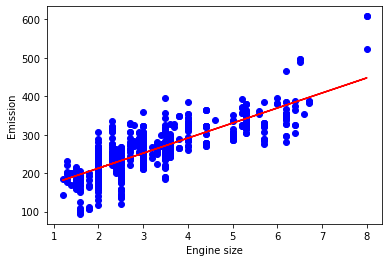

In [65]:
plt.scatter(train['Engine_Size_(L)'], train['CO2_Emissions_(g/km)'],  color='blue')
plt.plot(train_x, regression_model.coef_[0][0]*train_x + regression_model.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation Metrics

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

## Accuracy Evaluation

In [67]:
test_x = np.asanyarray(test[['Engine_Size_(L)']])
test_y = np.asanyarray(test[['CO2_Emissions_(g/km)']])
test_y_hat = regression_model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 26.43
Residual sum of squares (MSE): 1168.12
R2-score: 0.60
